In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

# Project 7 _ Car Price Prediction ( Car Data csv)
### YT - Siddhardhan

##### Car Data ---> Data Pre-Processing ---> Train Test Split ---> Linear & Lasso Regression Model

In [44]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [13]:
# Data Collection
car_data = pd.read_csv(r'C:\Users\Home\Desktop\ML Projects\YT - Siddhardhan\car data.csv')
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
# Checking Missing Values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
# Statistical Measure of Dataset
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
# Info
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
# Checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print('-----------------------------------')
print(car_data.Seller_Type.value_counts())
print('-----------------------------------')
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
-----------------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
-----------------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [22]:
# Encoding the Categorical Data
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [24]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [40]:
# Training and Testing Data
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
y = car_data['Selling_Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42)

In [41]:
# Training the Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
# Model Evaluation

# R square error on the training data
train_prediction = model.predict(X_train)
training_data_accuracy = metrics.r2_score(train_prediction,y_train)
print("r2_score on the training data :  ",training_data_accuracy)

# R square error on the test data
test_prediction = model.predict(X_test)
testing_data_accuracy = metrics.r2_score(test_prediction,y_test)
print("r2_score on the testing data :  ",testing_data_accuracy)

r2_score on the training data :   0.7998618265707464
r2_score on the testing data :   0.6915335810239489


Text(0, 0.5, 'Predicted Price')

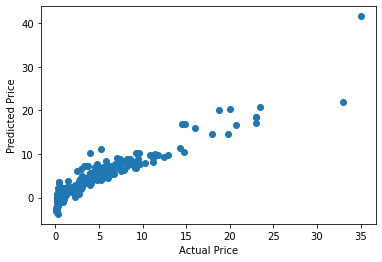

In [46]:
# Visualize the actual prices and predicted prices
plt.scatter(y_train,train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

Text(0, 0.5, 'Predicted Price')

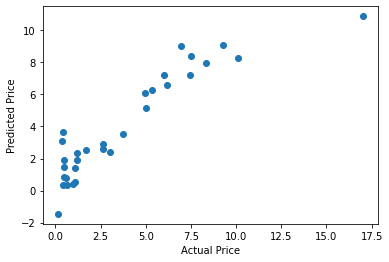

In [47]:
# Visualize the actual prices and predicted prices
plt.scatter(y_test,test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [48]:
# Training the Model
model = Lasso()
model.fit(X_train,y_train)

Lasso()

In [49]:
# Model Evaluation

# R square error on the training data
train_prediction = model.predict(X_train)
training_data_accuracy = metrics.r2_score(train_prediction,y_train)
print("accuracy on the training data :  ",training_data_accuracy)

# R square error on the test data
test_prediction = model.predict(X_test)
testing_data_accuracy = metrics.r2_score(test_prediction,y_test)
print("accuracy on the testing data :  ",testing_data_accuracy)

accuracy on the training data :   0.7998618265707464
accuracy on the testing data :   0.6915335810239489


Text(0, 0.5, 'Predicted Price')

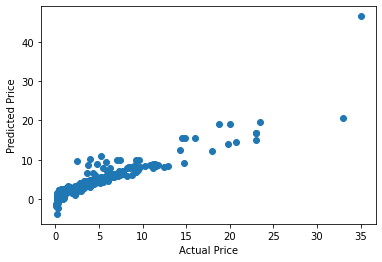

In [50]:
# Visualize the actual prices and predicted prices
plt.scatter(y_train,train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

Text(0, 0.5, 'Predicted Price')

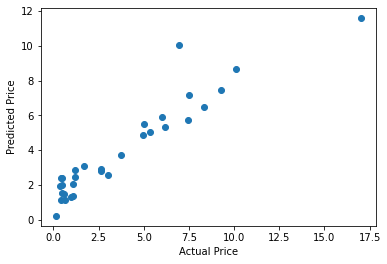

In [51]:
# Visualize the actual prices and predicted prices
plt.scatter(y_test,test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')